# Axisymmetric Spacetimes : TwoBHs in Brill-Linquist

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from scipy.integrate import simpson

## Importing & Accessing data 

In [32]:
df1 = pd.read_csv("./data/BH1_horizon.csv")
print(df1)

df2 = pd.read_csv("./data/BH2_horizon.csv")
print(df2)

df = pd.read_csv("./data/horizon_common.csv")
print(df)

theta1 = df1["theta"].values
h1 = df1["h"].values

theta2 = df2["theta"].values
h2 = df2["h"].values

theta = df["theta"].values
h = df["h"].values

            theta         h
0    1.000000e-08  0.382021
1    2.108452e-02  0.382023
2    4.216904e-02  0.382036
3    6.325355e-02  0.382059
4    8.433807e-02  0.382091
..            ...       ...
145  3.057255e+00  0.414101
146  3.078339e+00  0.414119
147  3.099424e+00  0.414132
148  3.120508e+00  0.414140
149  3.141593e+00  0.414141

[150 rows x 2 columns]
            theta         h
0    1.000000e-08  0.449785
1    2.108452e-02  0.449785
2    4.216904e-02  0.449780
3    6.325355e-02  0.449772
4    8.433807e-02  0.449761
..            ...       ...
145  3.057255e+00  0.431197
146  3.078339e+00  0.431180
147  3.099424e+00  0.431169
148  3.120508e+00  0.431162
149  3.141593e+00  0.431161

[150 rows x 2 columns]
            theta         h
0    1.000000e-08  1.746563
1    7.873676e-03  1.746548
2    1.574734e-02  1.746427
3    2.362101e-02  1.746212
4    3.149467e-02  1.745907
..            ...       ...
395  3.110098e+00  1.745907
396  3.117972e+00  1.746212
397  3.125845e+00  1.746427


## Values of your own control!

In [33]:
# Modify the value here (from input.py):
Ntheta_indiv  = 150
Ntheta_common = 400
M1  = 1.0
M2  = 1.0
sep = 0.5                 # separation factor (critical = 0.767)
z0  = sep*(M1 + M2) 

# Modify with your own phi resolution! 
phi_common = np.linspace(0, 2*np.pi, Ntheta_common)
phi_indiv = np.linspace(0, 2*np.pi, Ntheta_indiv)

# Making a meshgrid of theta and phi values
phi_commongrid, theta_commongrid = np.meshgrid(phi_common, theta)
phi_indivgrid, theta_indivgrid = np.meshgrid(phi_indiv, theta1)

## Initial guess function $h(\theta)_{\text{guess}}$, from Input.py

### See here $\rightarrow$ https://www.desmos.com/calculator/x6iyq0kvln

In [34]:
def hguess(theta):
    # scale 
    s = 3
    # base radius ~ combined mass scale
    R0 = 0.5 * (M1 + M2)
    # small oblateness (helps convergence)
    eps = 0.2
    # deformation term (Legendre P2)
    P2 = 0.5 * (3*np.cos(theta)**2 - 1)
    # final shape
    r = s * R0 * (1 + eps * P2)
    return r

h0 = hguess(theta)
#print(h0)

## Conversion to Cartesian coordinates for 3D visualisations

In [35]:
def cartesian(r, t, p):
    x = r*np.sin(t)*np.cos(p)
    y = r*np.sin(t)*np.sin(p)
    z = r*np.cos(t)
    return x, y, z

def cartesian1(r, t, p):
    x = r*np.sin(t)*np.cos(p)
    y = r*np.sin(t)*np.sin(p)
    z = r*np.cos(t) - z0
    return x, y, z

def cartesian2(r, t, p):
    x = r*np.sin(t)*np.cos(p)
    y = r*np.sin(t)*np.sin(p)
    z = r*np.cos(t) + z0
    return x, y, z

In [36]:
# Make h0 and h 2D arrays matching theta_grid
#h0_2d = np.tile(h0[:, np.newaxis], (1, phi_grid.shape[1]))
h_2d = np.tile(h[:, np.newaxis], (1, phi_commongrid.shape[1]))
h1_2d = np.tile(h1[:, np.newaxis], (1, phi_indivgrid.shape[1]))
h2_2d = np.tile(h2[:, np.newaxis], (1, phi_indivgrid.shape[1]))

# Converting to Cartesian 
#x0, y0, z0 = cartesian(h0_2d, theta_grid, phi_grid)
xsol, ysol, zsol = cartesian(h_2d, theta_commongrid, phi_commongrid)
x1sol, y1sol, z1sol = cartesian1(h1_2d, theta_indivgrid, phi_indivgrid)
x2sol, y2sol, z2sol = cartesian2(h2_2d, theta_indivgrid, phi_indivgrid)

## Plotting! 

### 2D Visualisation

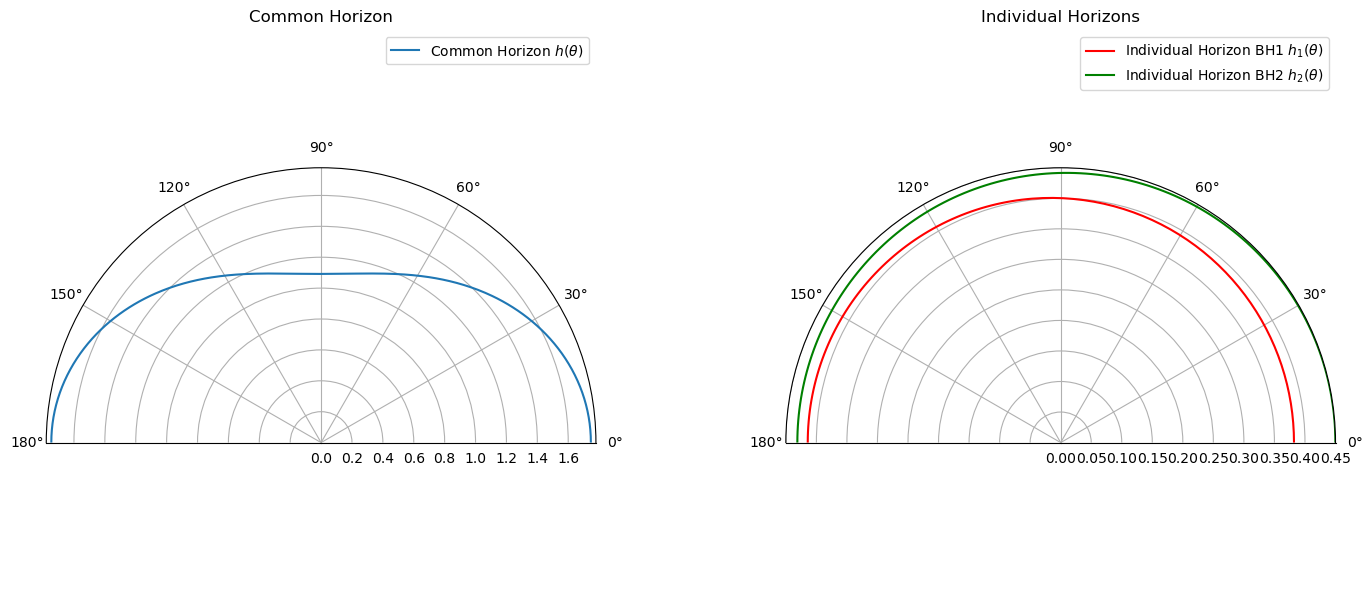

In [37]:
fig2D_polar, axes = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={'polar': True},
                                 gridspec_kw={'width_ratios': [1, 1]})

# Left subplot: Common Horizon
axes[0].set_thetamin(0)
axes[0].set_thetamax(180)
axes[0].plot(theta, h, label=r"Common Horizon $h(\theta)$")
axes[0].set_title("Common Horizon")
axes[0].legend()

# Right subplot: Individual Horizons
axes[1].set_rlim(0, 0.45)
axes[1].set_thetamin(0)
axes[1].set_thetamax(180)
axes[1].plot(theta1, h1, color="red", alpha=1, label=r"Individual Horizon BH1 $h_1(\theta)$")
axes[1].plot(theta2, h2, color="green", alpha=1, label=r"Individual Horizon BH2 $h_2(\theta)$")
axes[1].set_title("Individual Horizons")
axes[1].legend()

plt.tight_layout()
plt.savefig("./Plots/AHpolar2BHs.png", dpi=300, bbox_inches='tight')
plt.show()

### 3D Visualisation

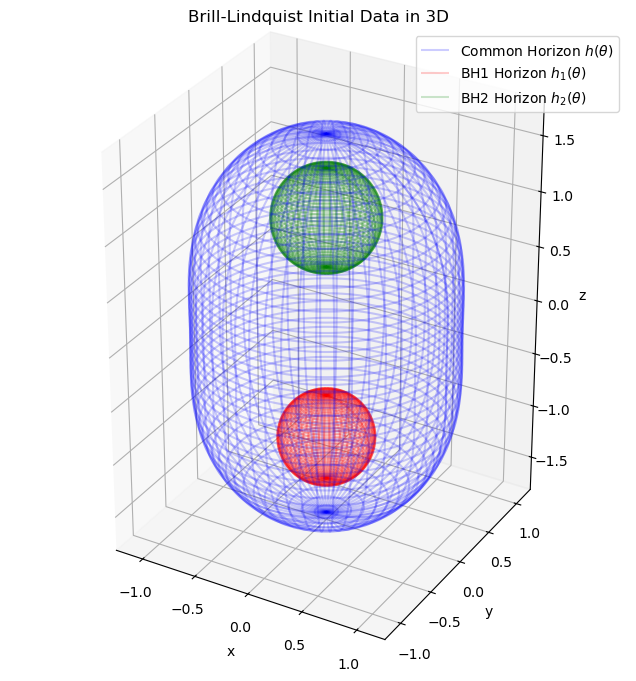

In [38]:
fig3D = plt.figure(figsize=(10,8))
ax = fig3D.add_subplot(111, projection='3d')

#ax.scatter(x0, y0, z0, c="orange", label="Initial guess", s=10)
#ax.scatter(xsol, ysol, zsol, c="blue", label="Solution", s=10)
#ax.plot_wireframe(x0, y0, z0, color="red", alpha=0.5, label="Initial guess")
ax.plot_wireframe(xsol, ysol, zsol, color="blue", alpha=0.2, label=r"Common Horizon $h(\theta)$")
ax.plot_wireframe(x1sol, y1sol, z1sol, color="red", alpha=0.2, label=r"BH1 Horizon $h_1(\theta)$")
ax.plot_wireframe(x2sol, y2sol, z2sol, color="green", alpha=0.2, label=r"BH2 Horizon $h_2(\theta)$")

ax.set_aspect('equal')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Brill-Lindquist Initial Data in 3D")
ax.legend()

plt.savefig("./Plots/AH3D2BHs.png", dpi=300, bbox_inches="tight")
plt.show()

### Cross section of 3D plot above

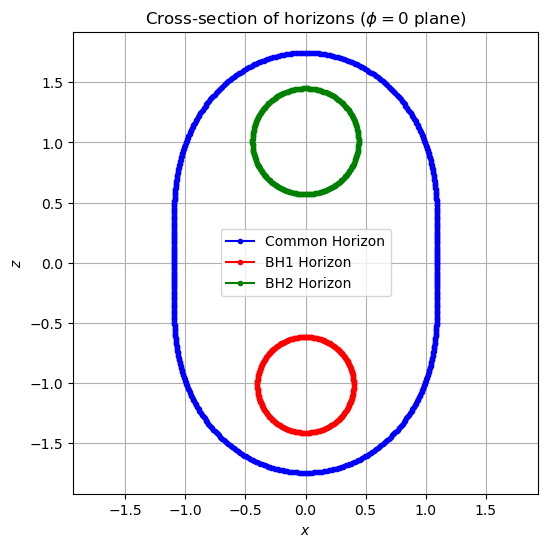

In [39]:
# Slice at phi = 0 plane
i_phi = 0  # first phi value corresponds to phi = 0

# Common horizon
x_c = xsol[:, i_phi]
z_c = zsol[:, i_phi]

# Individual BH1 horizon
x1 = x1sol[:, i_phi]
z1 = z1sol[:, i_phi]

# Individual BH2 horizon
x2 = x2sol[:, i_phi]
z2 = z2sol[:, i_phi]

# Plot all in same plane
plt.figure(figsize=(6,6))
plt.plot(x_c, z_c, '-o', markersize=3, label='Common Horizon', color='blue')
plt.plot(x1, z1, '-o', markersize=3, label='BH1 Horizon', color='red')
plt.plot(x2, z2, '-o', markersize=3, label='BH2 Horizon', color='green')
plt.plot(-x_c, z_c, '-o', markersize=3, color='blue')
plt.plot(-x1, z1, '-o', markersize=3, color='red')
plt.plot(-x2, z2, '-o', markersize=3, color='green')

plt.xlabel(r'$x$')
plt.ylabel(r'$z$')
plt.title(r'Cross-section of horizons ($\phi = 0$ plane)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

## Area calculation!

### Spatial Metric $\gamma_{ij}$

### Proper Area function $A$